In [ ]:
import pandas as pd
pd.read_csv("/Chemical Composion of Ceramic.csv")
data=pd.read_csv("/Chemical Composion of Ceramic.csv")
data

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,DY-M-3-g,Glaze,0.34,0.55,12.37,70.70,5.33,8.06,0.06,1.61,1250,10,90,30,250,520,30,140,690
84,DY-QC-1-g,Glaze,0.72,0.34,12.20,72.19,6.19,6.06,0.04,1.27,1700,60,110,10,270,540,40,120,630
85,DY-QC-2-g,Glaze,0.23,0.24,12.99,71.81,5.25,7.15,0.05,1.29,750,40,100,0,240,470,40,120,480
86,DY-QC-3-g,Glaze,0.14,0.46,12.62,69.16,4.34,11.03,0.05,1.20,920,40,90,20,230,470,40,130,1100


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data.drop("Ceramic Name", axis=1, inplace=True)
X = data.drop('Part', axis=1)
y = data['Part']

In [ ]:
X

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.34,0.55,12.37,70.70,5.33,8.06,0.06,1.61,1250,10,90,30,250,520,30,140,690
84,0.72,0.34,12.20,72.19,6.19,6.06,0.04,1.27,1700,60,110,10,270,540,40,120,630
85,0.23,0.24,12.99,71.81,5.25,7.15,0.05,1.29,750,40,100,0,240,470,40,120,480
86,0.14,0.46,12.62,69.16,4.34,11.03,0.05,1.20,920,40,90,20,230,470,40,130,1100


In [ ]:
y

0      Body
1      Body
2      Body
3      Body
4      Body
      ...  
83    Glaze
84    Glaze
85    Glaze
86    Glaze
87    Glaze
Name: Part, Length: 88, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабирование признаков с помощью StandardScaler из sklearn.preprocessing для нормализации значений признаков.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Создание модели нейронной сети:**

tf.keras.Sequential(): Этот код создает последовательную модель нейронной сети в Keras, где слои добавляются один за другим.

tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)): Это первый полносвязный (dense) слой с 128 нейронами и функцией активации ReLU. input_shape=(X_train.shape[1],) задает форму входных данных, основанную на количестве признаков в данных.

tf.keras.layers.Dense(64, activation='relu'): Это второй скрытый полносвязный слой с 64 нейронами и функцией активации ReLU. Этот слой не имеет параметра input_shape, так как он получает входные данные от предыдущего слоя, и их форма определена автоматически.

tf.keras.layers.Dense(1, activation='sigmoid'): Это выходной слой с одним нейроном и функцией активации sigmoid. В случае бинарной классификации такой слой используется для предсказания вероятности принадлежности к одному из классов.

Функции активации в нейронных сетях используются для введения нелинейности в выходные значения нейронов. Они добавляют нелинейность в модель, что позволяет нейронной сети лучше моделировать сложные зависимости в данных.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # Полносвязный слой с функцией активации ReLU
    tf.keras.layers.Dense(64, activation='relu'),  # Дополнительный скрытый слой
    tf.keras.layers.Dense(1, activation='sigmoid') # Выходной слой с функцией активации sigmoid для бинарной классификации
])

**Компиляция модели:**

model.compile(): Этот метод компилирует модель, определяя параметры для обучения.

optimizer='adam': Оптимизатор Adam выбран для обновления весов модели во время обучения. Adam - это адаптивный метод оптимизации с адаптивной скоростью обучения.

loss='binary_crossentropy': Функция потерь, используемая для бинарной классификации. В данном случае используется кросс-энтропия для двух классов.

metrics=['accuracy']: Метрика, используемая для оценки производительности модели. Здесь используется метрика точности (accuracy).

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Для бинарной классификации
              metrics=['accuracy'])

label_encoder заменит строковые метки на числовые значения (например, 0 и 1), что позволит правильно обработать их моделью при использовании функции потерь binary_crossentropy.

**Обучение модели:**

model.fit(): Этот метод запускает процесс обучения модели на обучающих данных.

batch_size=32: Это количество образцов данных, обрабатываемых моделью за одну итерацию обучения. Модель обновляет свои веса после каждой итерации.

validation_data=(X_test, y_test): При обучении нейронной сети этот метод оценивает модель на валидационном наборе данных (X_test, y_test) после каждой эпохи обучения. Результаты проверки модели (точность и функция потерь) сохраняются в объекте history, который возвращается после обучения.

Это позволяет отслеживать, как модель проявляет себя не только на обучающем наборе данных (X_train, y_train), но и на данных, которые она не видела во время обучения (X_test, y_test). Такая проверка помогает выявить переобучение (переобучение на обучающих данных без способности обобщаться на новые данные) или недообучение (недостаточное обучение модели на обучающих данных).

Этот метод fit обучает модель на обучающих данных и возвращает объект history, который содержит информацию о процессе обучения (такую как значения функции потерь и метрики точности на каждой эпохе).

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
3/3 [==============================] - 1s 129ms/step - loss: 0.6544 - accuracy: 0.5857 - val_loss: 0.5686 - val_accuracy: 0.9444
Epoch 2/10
3/3 [==============================] - 0s 28ms/step - loss: 0.5248 - accuracy: 0.8714 - val_loss: 0.4755 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 34ms/step - loss: 0.4292 - accuracy: 0.9857 - val_loss: 0.3997 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 31ms/step - loss: 0.3549 - accuracy: 0.9857 - val_loss: 0.3426 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 32ms/step - loss: 0.2971 - accuracy: 1.0000 - val_loss: 0.2939 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 20ms/step - loss: 0.2468 - accuracy: 1.0000 - val_loss: 0.2517 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 21ms/step - loss: 0.2065 - accuracy: 1.0000 - val_loss: 0.2168 - val_accuracy: 1.0000
Epoch 8/10
3/3 [==========

**Оценка модели:**

model.evaluate(): Этот метод оценивает производительность модели на тестовых данных.

test_loss, test_accuracy: Эти переменные принимают значения функции потерь и точности модели соответственно на тестовых данных.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Точность на тестовых данных: {test_accuracy}")

1/1 [==============================] - 0s 26ms/step - loss: 0.1353 - accuracy: 1.0000
Точность на тестовых данных: 1.0


In [ ]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Визуализация результатов обучения модели: график точности модели на обучающем и тестовом наборе данных в течение эпох.

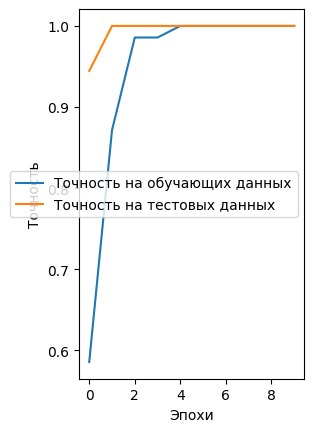

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучающих данных')
plt.plot(history.history['val_accuracy'], label='Точность на тестовых данных')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

График функции потерь модели на обучающем и тестовом наборах данных в течение эпох.

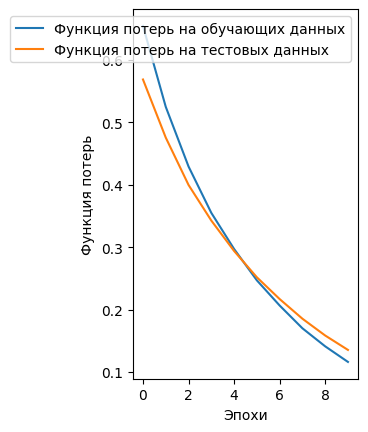

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Функция потерь на обучающих данных')
plt.plot(history.history['val_loss'], label='Функция потерь на тестовых данных')
plt.xlabel('Эпохи')
plt.ylabel('Функция потерь')
plt.legend()